In [1]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


/Users/edz/opt/anaconda3/lib/python3.8/site-packages/pyod/utils/data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '



On Training Data:
IForest ROC:0.9956, precision @ rank n:0.85

On Test Data:
IForest ROC:0.9989, precision @ rank n:0.9


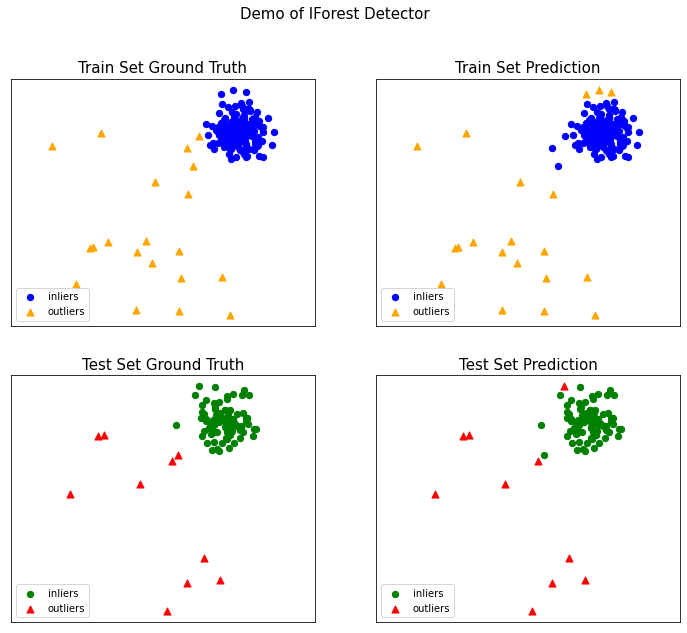

In [2]:
if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train IForest detector
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

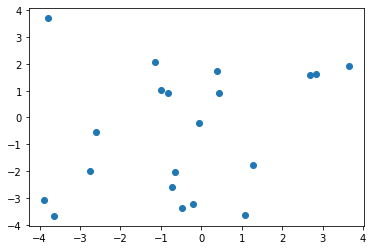

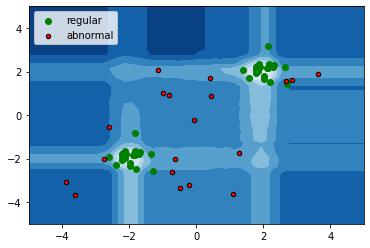

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
# 创建一个均值为0,标准差为0.3的正态分布
X = 0.3 * rng.randn(100, 2)
# np.r_是按列连接两个矩阵，就是把两矩阵上下拼接，要求列数相等。
# np.c_是按行连接两个矩阵，就是把两矩阵左右拼接，要求行数相等。
X_train = np.r_[X + 2, X - 2]
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
x_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
plt.scatter(x_outliers.T[0], x_outliers.T[1])
plt.show()
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
# 对训练数据预测
# y_pred_train = clf.predict(X_train)
# 对测试数据预测
# y_pred_test = clf.predict(X_test)
# 异常值预测
# y_pred_outliers = clf.predict(x_outliers)
# 生成网格点 xx.shape = [50 * 50] 的x位置坐标
# 生成网格点 yy.shape = [50 * 50] 的y位置坐标
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
# 通过decision_function 将坐标系上的点通过独立森林进行检测，以备稍后做背景。
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# 构建背景
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
# 在背景上描绘测试点
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
# 在背景上描绘异常点
c = plt.scatter(x_outliers[:, 0], x_outliers[:, 1], c='red', s=20, edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
"""
说明的位置
upper center
best
lower left
center
upper right
upper left
center right
lower right
right
lower center
center left
"""
plt.legend([b2, c], ['regular', 'abnormal'], loc='upper left')
plt.show()